In [15]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
from skimage.morphology import opening
from skimage import filters

im = plt.imread('fyp2021p3/data/example_image/ISIC_0001769.jpg')
mask=plt.imread('fyp2021p3/data/example_segmentation/ISIC_0001769_segmentation.png')

3.545708406819518


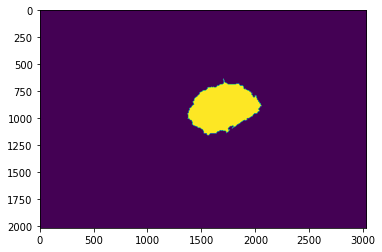

In [2]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100)

plt.imshow(mask)


In [3]:
# A way to measure width/height 

pixels_in_col = np.max(np.sum(mask, axis=0))
# pixels_in_row = 

print(pixels_in_col)

469.0


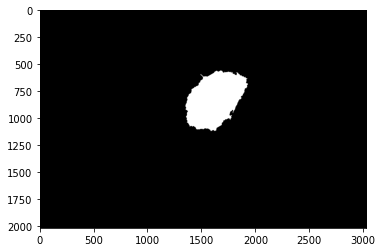

In [4]:
# Diameter at an angle

from skimage import transform

rot_im = transform.rotate(mask, 30)
plt.imshow(rot_im, cmap='gray')


In [6]:
#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(20)

print(struct_el)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


216160.0
177421


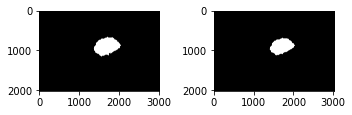

In [7]:
mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify it's smaller
print(area)
print(np.sum(mask_eroded))

38739.0


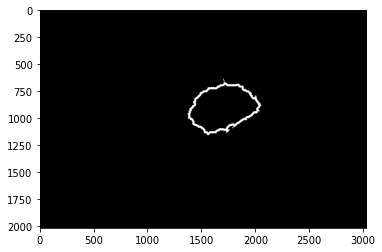

In [8]:
# Subtract the two masks from each other to get the border/perimeter

image_perimeter = mask - mask_eroded

plt.imshow(image_perimeter, cmap='gray') #The perimeter is very thin so it might be difficult to see on the screen

#What is the length? 
print(np.sum(image_perimeter))


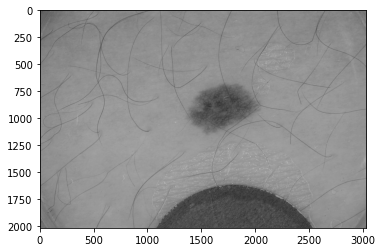

In [9]:
# Work with color image as grayscale

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(im)
plt.imshow(gray, cmap='gray')



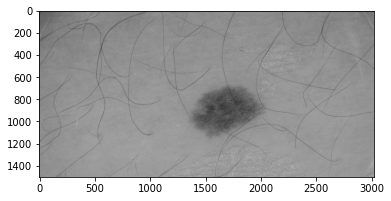

In [10]:
# Let's get rid of the marker
gray2 = gray[0:1500,:]
plt.imshow(gray2, cmap='gray')

mask2 = mask[0:1500,:]


(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 30.8587 ,  53.08448,  75.31026,  97.53604, 119.76182, 141.9876 ,
        164.21338, 186.43916, 208.66494, 230.89072, 253.1165 ]),
 <a list of 3024 BarContainer objects>)

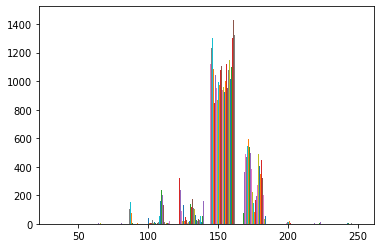

In [11]:
#Look at intensities of image
plt.hist(gray2)


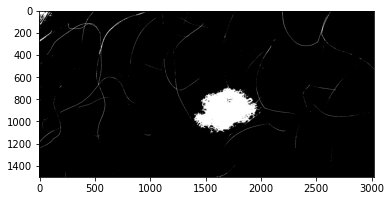

In [12]:
# Threshold
mymask = gray2 < 120  #Pixels with lower intensities will be equal to 1 in the mask
plt.imshow(mymask, cmap='gray')

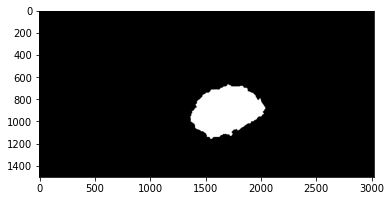

In [14]:
# Opening = first EROSION, then DILATION 

# Erosion will get rid of hairs but also make the lesion smaller. 
# Dilation will restore the lesion (but not the hairs)

struct_el = morphology.disk(5)
opened = opening(mask2, struct_el)

plt.imshow(opened, cmap='gray')

# Filtering 

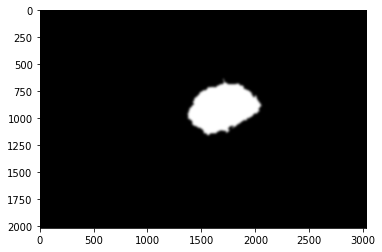

In [16]:
# Gaussian filtering (blur)



blurred = filters.gaussian(mask,sigma=10)

plt.imshow(blurred, cmap='gray')

#What kind of values are in the image now?


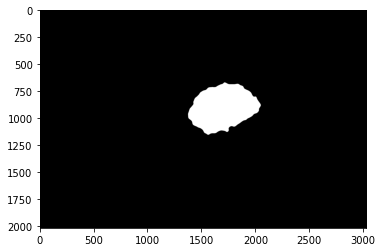

In [17]:
# Threshold again

mask2 = blurred > 0.5
plt.imshow(mask2, cmap='gray')


<ipython-input-18-5012c18a01c6>:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  blurred = filters.gaussian(im,sigma=25)


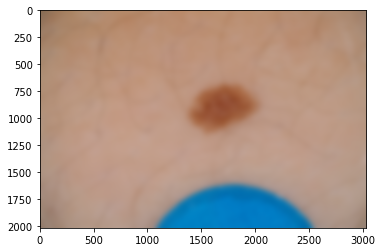

In [18]:
# Blur color image - this could be useful for measuring color (variability)

blurred = filters.gaussian(im,sigma=25)

plt.imshow(blurred)
